In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [24]:
#Top-10 Reviewer
#此output可能會跟Desired output不一樣,但答案是正確的,因為有些Score count一樣,但是排列順序不同,所以取到的前10名不一樣
reviews=pd.read_csv("Reviews.csv")
reviews=reviews[:10000]
data=reviews['UserId'].value_counts().rename_axis('UserId').reset_index(name='Score count')
data=data[:10]
data['Score mean']=0.0
data['ProfileName']=""
for i in range(data.shape[0]):
    temp=reviews[reviews.UserId == data['UserId'][i]].reset_index()
    data['Score mean'][i]=(temp['Score'].sum())/data['Score count'][i]
    data['ProfileName'][i]=temp['ProfileName'][0]
print(data)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


           UserId  Score count  Score mean  \
0  A1Z54EM24Y40LL           17    3.882353   
1  A2SZLNSI5KOQJT           10    3.800000   
2  A35R32TA60XD57            9    4.111111   
3  A281NPSIMI1C2R            8    5.000000   
4  A3NHUQ33CFH3VM            7    3.142857   
5  A3PJZ8TU8FDQ1K            7    4.714286   
6  A3OXHLG6DIBRW8            7    4.428571   
7  A3TX6CWSZL02PW            6    5.000000   
8  A26NFIQ7KWI8Y7            6    2.666667   
9   AY12DBB0U420B            6    4.500000   

                                  ProfileName  
0                                          c2  
1  Carrie, "Formerly &#34;Sister Carrie&#34;"  
2                                    M. Torma  
3      Rebecca of Amazon "The Rebecca Review"  
4                                Citizen John  
5                                Jared Castle  
6                            C. F. Hill "CFH"  
7                          LaVerne ":LaVerne"  
8                                     kt rose  
9            

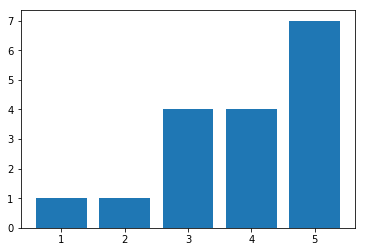

In [25]:
#Plot score distribution for the user with the most number of reviews
reviews=pd.read_csv("Reviews.csv")
reviews=reviews[:10000]
most_reviews=reviews[reviews.UserId == data['UserId'][0]]['Score'].reset_index()
most_reviews=most_reviews['Score'].value_counts().rename_axis('Score').reset_index(name='Score count')
plt.bar(most_reviews['Score'],most_reviews['Score count'])
plt.show()

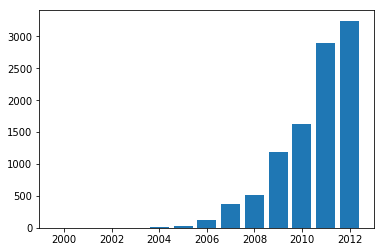

In [26]:
#Plot pandas Series DataFrame (Time->Date)
reviews=pd.read_csv("Reviews.csv")
reviews=reviews[:10000]
score_year=reviews
score_year=score_year['Time']
score_year=pd.to_datetime(score_year, unit='s').dt.year
score_year=score_year.value_counts().rename_axis('Year').reset_index(name='Score count')
plt.bar(score_year['Year'],score_year['Score count'])
plt.show()

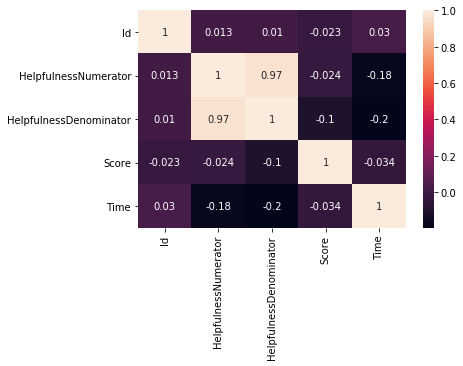

In [27]:
#Plot HeatMap using seaborn
reviews=pd.read_csv("Reviews.csv")
reviews=reviews[:10000]
reviews.drop(["ProductId"], axis=1)
reviews.drop(["UserId"], axis=1)
reviews.drop(["ProfileName"], axis=1)
reviews.drop(["Summary"], axis=1)
reviews.drop(["Text"], axis=1)
sns.heatmap(reviews.corr(),annot=True)
plt.show()

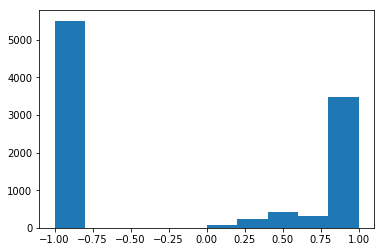

In [28]:
#Helpful percent
reviews=pd.read_csv("Reviews.csv")
reviews=reviews[:10000]
Numerator=reviews['HelpfulnessNumerator']
Denominator=reviews['HelpfulnessDenominator']
result=Numerator/Denominator
result=result.fillna(-1)
result=result[result<=1]
result=result.replace(0,-1)
plt.hist(result)
plt.show()